<a href="https://colab.research.google.com/github/bsaha205/asd/blob/main/ASD_Detection_Combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading dataset
ch = pd.read_csv("/content/drive/MyDrive/Autism_disorder/Autism-Child-Data.csv",na_values=['?'])
adu = pd.read_csv("/content/drive/MyDrive/Autism_disorder/Autism-Adult-Data.csv",na_values=['?'])

In [ ]:
#Children
ch.sample(5)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
20,21,1,1,1,1,1,1,1,0,1,...,m,White-European,yes,no,South Africa,no,8,4-11 years,Parent,YES
6,7,1,0,1,1,1,1,0,1,0,...,m,White-European,no,no,United Kingdom,no,7,4-11 years,Parent,YES
97,98,1,1,1,1,1,0,1,0,1,...,m,White-European,no,no,Australia,no,8,4-11 years,Parent,YES
165,166,1,0,0,0,1,1,1,0,0,...,f,Others,no,no,Australia,no,5,4-11 years,Self,NO
116,117,1,1,1,1,1,1,1,0,1,...,f,Asian,no,no,United States,no,9,4-11 years,Parent,YES


In [ ]:
#Adults
adu.sample(5)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
598,599,1,0,0,0,0,0,0,1,0,...,f,South Asian,no,no,India,no,3,18 and more,Self,NO
322,323,1,1,1,0,1,1,1,1,0,...,m,Middle Eastern,no,no,United Arab Emirates,no,8,18 and more,Self,YES
218,219,1,1,0,1,1,0,1,1,0,...,m,White-European,no,no,Bangladesh,no,7,18 and more,Self,YES
593,594,1,0,0,0,0,0,0,0,0,...,m,NaN,no,no,Russia,no,1,18 and more,NaN,NO
561,562,1,0,0,1,1,1,1,1,1,...,m,Black,no,no,United States,no,8,18 and more,Self,YES


In [ ]:
# Number of tuples and fields
print("Children    :",ch.shape)
print("Adults      :",adu.shape)

Children    : (292, 22)
Adults      : (704, 22)


In [ ]:
#children
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               292 non-null    int64  
 1   A1_Score         292 non-null    int64  
 2   A2_Score         292 non-null    int64  
 3   A3_Score         292 non-null    int64  
 4   A4_Score         292 non-null    int64  
 5   A5_Score         292 non-null    int64  
 6   A6_Score         292 non-null    int64  
 7   A7_Score         292 non-null    int64  
 8   A8_Score         292 non-null    int64  
 9   A9_Score         292 non-null    int64  
 10  A10_Score        292 non-null    int64  
 11  age              288 non-null    float64
 12  gender           292 non-null    object 
 13  ethnicity        249 non-null    object 
 14  jundice          292 non-null    object 
 15  austim           292 non-null    object 
 16  contry_of_res    292 non-null    object 
 17  used_app_before 

In [ ]:
#Adults
adu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               704 non-null    int64  
 1   A1_Score         704 non-null    int64  
 2   A2_Score         704 non-null    int64  
 3   A3_Score         704 non-null    int64  
 4   A4_Score         704 non-null    int64  
 5   A5_Score         704 non-null    int64  
 6   A6_Score         704 non-null    int64  
 7   A7_Score         704 non-null    int64  
 8   A8_Score         704 non-null    int64  
 9   A9_Score         704 non-null    int64  
 10  A10_Score        704 non-null    int64  
 11  age              702 non-null    float64
 12  gender           704 non-null    object 
 13  ethnicity        609 non-null    object 
 14  jundice          704 non-null    object 
 15  austim           704 non-null    object 
 16  contry_of_res    704 non-null    object 
 17  used_app_before 

In [ ]:
#Children
ch.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,146.500000,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,84.437354,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,73.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,146.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,219.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,292.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [ ]:
#Adults
adu.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,352.500000,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,203.371581,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,176.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,352.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,528.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [ ]:
#Total number of missing values in each dataset
print("Total no. of missing values in Children's dataset   : ",ch.isnull().sum().sum())
print("Total no. of missing values in Adults's dataset     : ",adu.isnull().sum().sum())

Total no. of missing values in Children's dataset   :  90
Total no. of missing values in Adults's dataset     :  192


In [ ]:
#Children
ch.isnull().sum()

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           43
Class/ASD           0
dtype: int64

In [ ]:
#Adults
adu.isnull().sum()

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

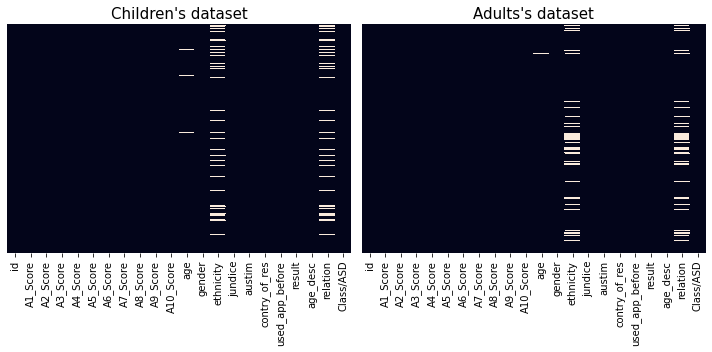

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

sns.heatmap(ch.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax[0])
ax[0].set_title("Children's dataset",fontsize = 15)

sns.heatmap(adu.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax[1])
ax[1].set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('heatmap.pdf', transparent=True, dpi=300)

In [ ]:
#ASD or Not
print("\nNo of children diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'YES']))
print("No of children not diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'NO']))

print("\nNo of adults diagonised with ASD = ",len(adu[adu['Class/ASD'] == 'YES']))
print("No of adults not diagonised with ASD = ",len(adu[adu['Class/ASD'] == 'NO']))


No of children diagonised with ASD =  141
No of children not diagonised with ASD =  151

No of adults diagonised with ASD =  189
No of adults not diagonised with ASD =  515


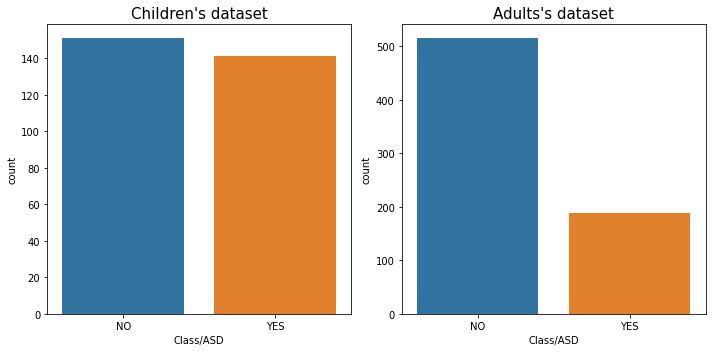

In [ ]:
#Data distribution
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.countplot(ch['Class/ASD'],ax=ax[0])
sns.countplot(adu['Class/ASD'],ax=ax[1])
ax[0].set_title("Children's dataset",fontsize = 15)
ax[1].set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('distribution.pdf', transparent=True, dpi=300)

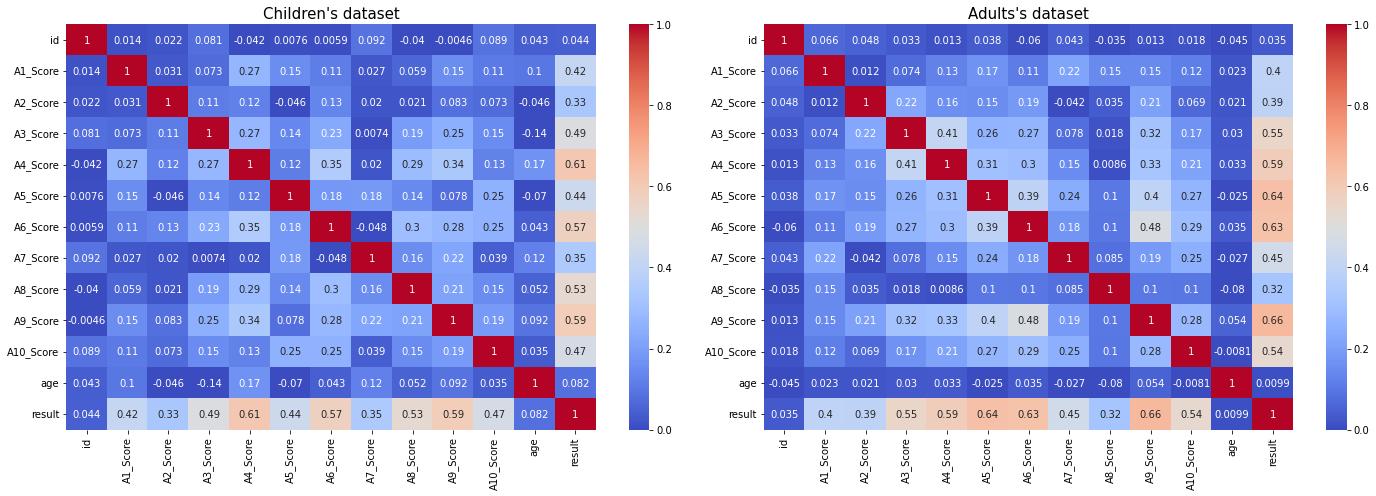

In [ ]:
#Correlation
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.heatmap(ch.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1,ax=ax[0])
sns.heatmap(adu.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1,ax=ax[1])
ax[0].set_title("Children's dataset",fontsize = 15)
ax[1].set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('correlation.pdf', transparent=True, dpi=300)

In [ ]:
#Number of missing values in each dataset
print("No of missing values in Children's dataset    = ",ch.isnull().sum().sum())
print("No of missing values in Adults's dataset      = ",adu.isnull().sum().sum())

No of missing values in Children's dataset    =  90
No of missing values in Adults's dataset      =  192


In [ ]:
#Imputing missing values of categorical features with mode
imputer_mode = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

ch.age = imputer_mode.fit_transform(ch.age.values.reshape(-1,1))[:,0]
ch.ethnicity = imputer_mode.fit_transform(ch.ethnicity.values.reshape(-1,1))[:,0]
ch.relation = imputer_mode.fit_transform(ch.relation.values.reshape(-1,1))[:,0]

adu.ethnicity = imputer_mode.fit_transform(adu.ethnicity.values.reshape(-1,1))[:,0]
adu.relation = imputer_mode.fit_transform(adu.relation.values.reshape(-1,1))[:,0]


#Imputing missing values of numerical features with mean
imputer_mode = SimpleImputer(missing_values=np.NaN, strategy='mean')

ch.age = imputer_mode.fit_transform(ch.age.values.reshape(-1,1))[:,0]
adu.age = imputer_mode.fit_transform(adu.age.values.reshape(-1,1))[:,0]

In [ ]:
print("After imputing,\nNo of missing values in Children's dataset    = ",ch.isnull().sum().sum())
print("After imputing,\nNo of missing values in Adults's dataset      = ",adu.isnull().sum().sum())

After imputing,
No of missing values in Children's dataset    =  0
After imputing,
No of missing values in Adults's dataset      =  0


In [ ]:
#Since age of toddlers are represented in months, age(in years) of children, adolescents and adults is converted to age in months.
ch.rename(columns = {'age':'Age_Mons'}, inplace = True)
adu.rename(columns = {'age':'Age_Mons'}, inplace = True)

ch['Age_Mons'] = ch['Age_Mons']*12
adu['Age_Mons'] = adu['Age_Mons']*12

In [ ]:
#Making classes of categorical variables same for all datasets
adu['ethnicity'] = adu['ethnicity'].replace('Others','others')

ch["relation"] = ch["relation"].replace('self','Self')

### **Model fitting**

### **Model fitting**

### Combined Dataset

In [ ]:
#Adding a new field that represents the age group
ch['Age_group'] = 'Children'
adu['Age_group'] = 'Adults'

In [ ]:
#Combining the dataset of children and adults to a single dataset
frames = [ch,adu]
final = pd.concat(frames)

In [ ]:
#imputing missing values
imputer_mode = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

final.contry_of_res = imputer_mode.fit_transform(final.contry_of_res.values.reshape(-1,1))[:,0]
final.used_app_before = imputer_mode.fit_transform(final.used_app_before.values.reshape(-1,1))[:,0]

In [ ]:
final.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,Age_group
0,1,1,1,0,0,1,1,0,1,0,...,Others,no,no,Jordan,no,5,4-11 years,Parent,NO,Children
1,2,1,1,0,0,1,1,0,1,0,...,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO,Children
2,3,1,1,0,0,0,1,1,1,0,...,White-European,no,no,Jordan,yes,5,4-11 years,Parent,NO,Children
3,4,0,1,0,0,1,1,0,0,0,...,White-European,yes,no,Jordan,no,4,4-11 years,Parent,NO,Children
4,5,1,1,1,1,1,1,1,1,1,...,Others,yes,no,United States,no,10,4-11 years,Parent,YES,Children


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 703
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               996 non-null    int64  
 1   A1_Score         996 non-null    int64  
 2   A2_Score         996 non-null    int64  
 3   A3_Score         996 non-null    int64  
 4   A4_Score         996 non-null    int64  
 5   A5_Score         996 non-null    int64  
 6   A6_Score         996 non-null    int64  
 7   A7_Score         996 non-null    int64  
 8   A8_Score         996 non-null    int64  
 9   A9_Score         996 non-null    int64  
 10  A10_Score        996 non-null    int64  
 11  Age_Mons         996 non-null    float64
 12  gender           996 non-null    object 
 13  ethnicity        996 non-null    object 
 14  jundice          996 non-null    object 
 15  austim           996 non-null    object 
 16  contry_of_res    996 non-null    object 
 17  used_app_before 

In [ ]:
final.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,result
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,292.106426,0.695783,0.476908,0.541165,0.512048,0.570281,0.409639,0.472892,0.604418,0.373494,0.618474,274.137301,5.275100
std,200.274512,0.460306,0.499717,0.498553,0.500106,0.495285,0.492014,0.499515,0.489221,0.483975,0.486005,210.244846,2.516802
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,0.000000
25%,125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,3.000000
50%,249.500000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,264.000000,5.000000
75%,455.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,360.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4596.000000,10.000000


In [ ]:
final.shape

(996, 23)

In [ ]:
print("\nNo of individuals diagonised with ASD = ",len(final[final['Class/ASD'] == 'YES']))
print("No of individuals not diagonised with ASD = ",len(final[final['Class/ASD'] == 'NO']))


No of individuals diagonised with ASD =  330
No of individuals not diagonised with ASD =  666


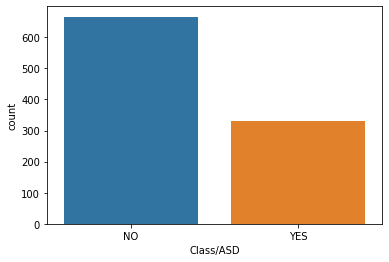

In [ ]:
sns.countplot(final['Class/ASD'])
plt.savefig('combined_dataset.pdf', transparent=True, dpi=300)

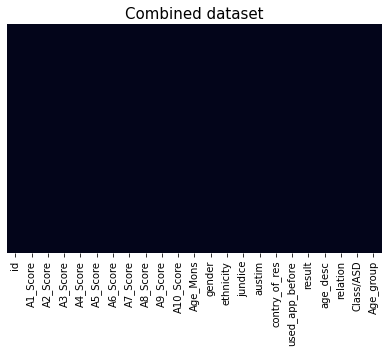

In [ ]:
fig, ax = plt.subplots(figsize=(5.5,5))

sns.heatmap(final.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax)
ax.set_title("Combined dataset",fontsize = 15)

fig.tight_layout()
plt.savefig('heatmap_final.pdf', transparent=True, dpi=300)

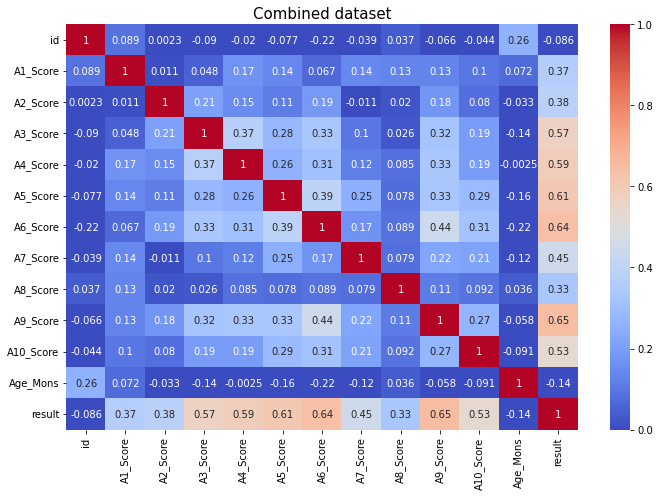

In [ ]:
#Correlation
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(final.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1,ax=ax)
ax.set_title("Combined dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('correlation_final.pdf', transparent=True, dpi=300)

*Spliting dependent and independent features*


In [ ]:
shuffled_data = final.sample(frac=1,random_state=4)
ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'YES']
non_ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'NO'].sample(n=666)
final= pd.concat([ASD_data, non_ASD_data])

In [ ]:
# Split the data into features and target label
raw_target= final['Class/ASD']
raw_features = final[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','Age_Mons', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result','relation']]

*Feature Scaling*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['Age_Mons', 'result']

features_minmax_transform = pd.DataFrame(data = raw_features)
features_minmax_transform[num_features] = scaler.fit_transform(raw_features[num_features])

In [ ]:
features_minmax_transform.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,gender,ethnicity,jundice,austim,contry_of_res,result,relation
121,1,0,1,1,1,1,1,1,1,1,0.034301,f,White-European,no,no,United States,0.9,Self
309,1,1,1,1,1,1,0,1,0,0,0.142480,f,Middle Eastern,no,no,United Kingdom,0.7,Self
301,1,1,1,1,1,1,1,1,1,1,0.076517,f,White-European,yes,no,United Kingdom,1.0,Self
524,1,1,1,1,0,1,0,1,1,1,0.087071,m,White-European,no,no,United Kingdom,0.8,Self
197,1,0,1,1,1,1,1,1,1,1,0.089710,m,White-European,no,no,Germany,0.9,Self


##Encoding Categorical variables

In [ ]:
features = pd.get_dummies(features_minmax_transform)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(raw_target)

*Function for Evaluation*

In [ ]:
def model_report(y_act, y_pred):
    from sklearn import metrics
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_curve, auc, log_loss
    print("Accuracy = ", accuracy_score(y_act, y_pred))
    print("Precision = " ,precision_score(y_act, y_pred))
    print("Recall\Sensitivity = " ,recall_score(y_act, y_pred))
    confusion = metrics.confusion_matrix(y_act, y_pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    specificity = TN / (TN + FP)
    print("Specificity = " ,specificity)
    print("F1 Score = " ,f1_score(y_act, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))
    print("Kappa score = ",cohen_kappa_score(y_act,y_pred))
    print("Log Loss = " ,log_loss(y_act, y_pred),"\n")
    pass


In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt


##Spliting Data


In [ ]:
X = features
y = target

## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
chi2_features = SelectKBest(chi2,k=75)
fit= chi2_features.fit(X, y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(features.columns)
featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(50,'Score')) 

                               Features       Score
8                              A9_Score  223.587733
5                              A6_Score  186.444131
3                              A4_Score  121.202318
4                              A5_Score  112.167723
2                              A3_Score   94.831550
11                               result   82.375528
9                             A10_Score   65.995649
6                              A7_Score   64.352114
1                              A2_Score   44.744991
107  contry_of_res_United Arab Emirates   35.582565
109         contry_of_res_United States   31.032798
0                              A1_Score   27.850997
7                              A8_Score   27.482103
18            ethnicity_Middle Eastern    20.818204
114                     relation_Parent   20.436989
72                 contry_of_res_Jordan   15.562309
23             ethnicity_White-European   12.413462
47                 contry_of_res_Canada   12.198645
64          

In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
# 700 features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2,k=75)
X = chi2_features.fit_transform(X, y)
y = target

In [ ]:
#Splitting the data into train test spit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

##KNeighborsClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [int(x) for x in np.linspace(1,1000,10)]
weights = ['uniform','distance']
algorithm =['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(x) for x in np.linspace(1,1000,10)]

random_grid = {'n_neighbors':n_neighbors,
               'weights':weights,
               'algorithm':algorithm,
               'leaf_size':leaf_size}
print(random_grid)

{'n_neighbors': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000]}


In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn_randomcv=RandomizedSearchCV(estimator= knn, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
knn_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 112, 223, 334, 445,
                                                      556, 667, 778, 889,
                                                      1000],
                                        'n_neighbors': [1, 112, 223, 334, 445,
                                                        556, 667, 778, 889,
                                                        1000],
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [ ]:
print('\n All results:')
print(knn_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.00174265, 0.00937543, 0.0016304 , 0.00076561, 0.00118208,
       0.00095034, 0.00311108, 0.0069376 , 0.00192351, 0.00107789,
       0.00073929, 0.00083199, 0.00072894, 0.00117011, 0.00137091,
       0.00076084, 0.00113602, 0.00085073, 0.00138903, 0.00115685,
       0.00132785, 0.00075345, 0.00080814, 0.0015327 , 0.00149961,
       0.00129194, 0.00114985, 0.00076022, 0.0016284 , 0.00071278,
       0.00118804, 0.00151196, 0.00183096, 0.0072422 , 0.00080385,
       0.00119238, 0.00141883, 0.00084257, 0.00080414, 0.00171332,
       0.00869675, 0.0010675 , 0.00142088, 0.00267167, 0.00358181,
       0.00476007, 0.00274138, 0.00257573, 0.00156536, 0.00205226,
       0.00166245, 0.00289435, 0.0019362 , 0.00225511, 0.00082059,
       0.00153275, 0.00506654, 0.00079808, 0.00217447, 0.00218129,
       0.00079455, 0.0029459 , 0.00083103, 0.00070691, 0.0007503 ,
       0.01534247, 0.00303769, 0.00080957, 0.00742712, 0.00077424,
       0.00135622, 0.00133238

In [ ]:
print('\n Best estimator:')
print(knn_randomcv.best_estimator_)


 Best estimator:
KNeighborsClassifier(algorithm='brute', leaf_size=112, n_neighbors=112)


In [ ]:
print('\n Best hyperparameters:')
print(knn_randomcv.best_params_)


 Best hyperparameters:
{'weights': 'uniform', 'n_neighbors': 112, 'leaf_size': 112, 'algorithm': 'brute'}


In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(weights='uniform', n_neighbors= 112, leaf_size=112, algorithm='brute')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=112, n_neighbors=112)

In [ ]:
y_pred_knn = knn.predict(X_test)
model_report(y_test, y_pred_knn)

Accuracy =  0.945
Precision =  0.9041095890410958
Recall\Sensitivity =  0.9428571428571428
Specificity =  0.9461538461538461
F1 Score =  0.923076923076923
AUC Score = 0.9445054945054944
Kappa score =  0.8803046789989118
Log Loss =  1.899660687630145 



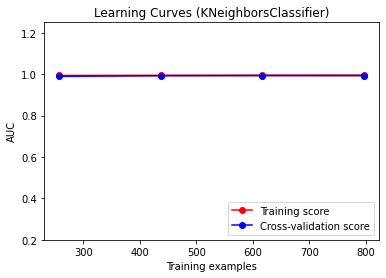

In [ ]:
title = "Learning Curves (KNeighborsClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
knn = neighbors.KNeighborsClassifier(weights='uniform', n_neighbors= 112, leaf_size=112, algorithm='brute')                                 # fill this in
plot_learning_curve(knn, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('KNN_curve.pdf', transparent=True, dpi=300)
plt.savefig('KNN_curve.eps', transparent=True, dpi=300)
plt.show()

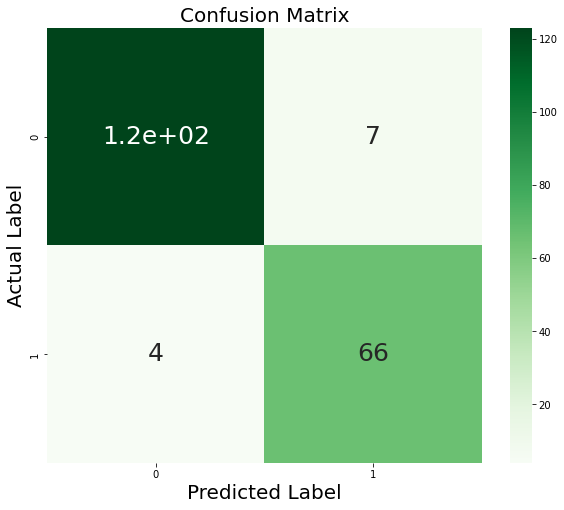

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('KNN_confusion.pdf', transparent=True, dpi=300)
plt.savefig('KNN_confusion.eps', transparent=True, dpi=300)

##SVM Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

C = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]

random_grid = {'C':C,
               'kernel':kernel,
               'degree':degree}
print(random_grid)

{'C': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc_randomcv=RandomizedSearchCV(estimator= svc, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
svc_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                              20],
                                        'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=100, verbose=2)

In [ ]:
print('\n All results:')
print(svc_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.0106627 , 0.01676192, 0.0101131 , 0.01190505, 0.01141219,
       0.02203808, 0.00960917, 0.01436915, 0.02335219, 0.00991702,
       0.01144066, 0.00979514, 0.0147543 , 0.02330418, 0.01373086,
       0.01432743, 0.00952806, 0.02235551, 0.00999022, 0.02865148,
       0.0141407 , 0.0100493 , 0.01603169, 0.00942554, 0.00973644,
       0.01369672, 0.02160306, 0.02176232, 0.0095674 , 0.02990508,
       0.01499128, 0.01457505, 0.01563768, 0.00987854, 0.00953312,
       0.02226572, 0.03320889, 0.02476797, 0.00990586, 0.01408949,
       0.01120582, 0.01445765, 0.02524652, 0.01008778, 0.01542859,
       0.00978498, 0.01048212, 0.01817088, 0.01312962, 0.01348104,
       0.01874051, 0.02265286, 0.01001   , 0.01118164, 0.01370702,
       0.01383839, 0.02130427, 0.01065283, 0.00915346, 0.01316218,
       0.0114099 , 0.01118374, 0.02142539, 0.01387568, 0.01691303,
       0.00966716, 0.02269497, 0.00937748, 0.01459203, 0.01433616,
       0.02246318, 0.00973144

In [ ]:
print('\n Best estimator:')
print(svc_randomcv.best_estimator_)


 Best estimator:
SVC(C=13, kernel='linear')


In [ ]:
print('\n Best hyperparameters:')
print(svc_randomcv.best_params_)


 Best hyperparameters:
{'kernel': 'linear', 'degree': 3, 'C': 13}


In [ ]:
svc = SVC(kernel='linear',degree=3, C=13)
svc.fit(X_train,y_train)

SVC(C=13, kernel='linear')

In [ ]:
y_pred_svc = svc.predict(X_test)
model_report(y_test, y_pred_svc)

Accuracy =  1.0
Precision =  1.0
Recall\Sensitivity =  1.0
Specificity =  1.0
F1 Score =  1.0
AUC Score = 1.0
Kappa score =  1.0
Log Loss =  9.992007221626413e-16 



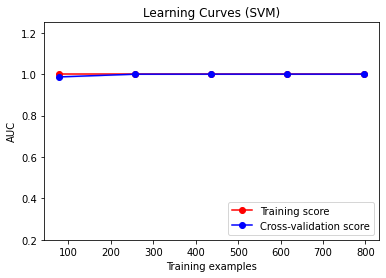

In [ ]:
title = "Learning Curves (SVM)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
svc = SVC(kernel='linear',degree=3, C=13)                               # fill this in
plot_learning_curve(svc, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('SVM_curve.pdf', transparent=True, dpi=300)
plt.savefig('SVM_curve.eps', transparent=True, dpi=300)
plt.show()

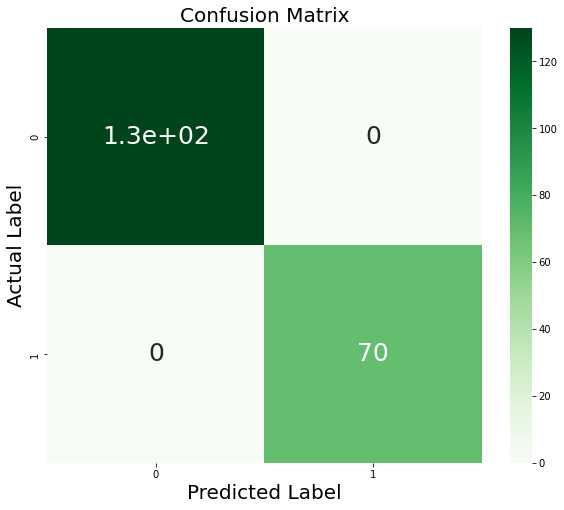

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('SVC_confusion.pdf', transparent=True, dpi=300)
plt.savefig('SVC_confusion.eps', transparent=True, dpi=300)

##Random Forest Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
#criterion used in trees
criterion = ['entropy','gini']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':criterion}
              
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100, n_jobs=-1)
#fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [ ]:
print('\n All results:')
print(rf_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.60112705, 3.03573756, 4.52417998, 4.60618043, 0.46460772,
       1.34190397, 4.46318469, 3.18452134, 3.09381447, 1.36382737,
       1.27935328, 3.00016527, 0.87752581, 1.30743194, 0.85638518,
       0.42264528, 3.75737286, 1.27750888, 1.69053297, 4.28168397,
       0.4375875 , 2.19379148, 3.53308234, 0.43962445, 2.77301669,
       1.70558972, 1.9589211 , 0.86109819, 1.73022094, 0.43409638,
       1.73135462, 1.6915081 , 0.86816483, 2.54952621, 4.89000101,
       3.56686778, 3.45304418, 3.53873091, 5.22559881, 4.00611181,
       1.32687588, 4.50464072, 1.71126208, 3.13390846, 4.4037899 ,
       1.70833611, 1.73755798, 3.10864449, 3.82514324, 1.24123955,
       3.39032221, 4.30778604, 3.280615  , 1.29414577, 3.11752734,
       0.4364769 , 3.10499511, 2.11785936, 1.85461164, 3.91064138,
       4.40242257, 0.87377744, 0.43799539, 4.54933867, 0.85562606,
       1.37774558, 4.11224627, 5.3744514 , 1.6969718 , 4.62323494,
       3.2692523 , 1.32181153

In [ ]:
print('\n Best estimator:')
print(rf_randomcv.best_estimator_)


 Best estimator:
RandomForestClassifier(criterion='entropy', max_depth=1000, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=200)


In [ ]:
print('\n Best hyperparameters:')
print(rf_randomcv.best_params_)


 Best hyperparameters:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 1000, 'criterion': 'entropy'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 1000, criterion = 'entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=1000, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=200)

In [ ]:
y_pred_rf = rf.predict(X_test)
model_report(y_test, y_pred_rf)

Accuracy =  1.0
Precision =  1.0
Recall\Sensitivity =  1.0
Specificity =  1.0
F1 Score =  1.0
AUC Score = 1.0
Kappa score =  1.0
Log Loss =  9.992007221626413e-16 



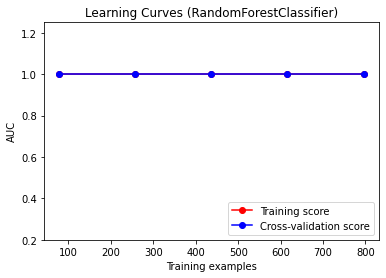

In [ ]:
title = "Learning Curves (RandomForestClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 1000, criterion = 'entropy')                             # fill this in
plot_learning_curve(rf, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('RF_curve.pdf', transparent=True, dpi=300)
plt.savefig('RF_curve.eps', transparent=True, dpi=300)
plt.show()

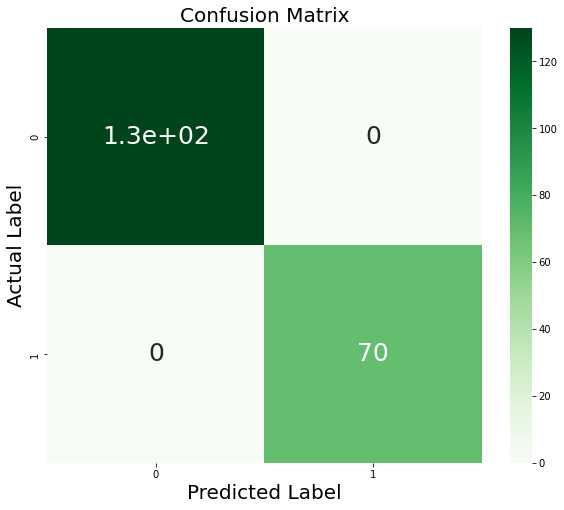

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('RF_confusion.pdf', transparent=True, dpi=300)
plt.savefig('RF_confusion.eps', transparent=True, dpi=300)

##DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_dict ={
             "criterion":['gini','entropy'],
             "max_depth":(150, 155, 160),
             "min_samples_split":range(1,10),
             "min_samples_leaf":range(1,5)
 }

decision_tree = DecisionTreeClassifier(random_state=42)

dt_decision_tree=RandomizedSearchCV(estimator=decision_tree, param_distributions=param_dict, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
dt_decision_tree.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': (150, 155, 160),
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 10)},
                   random_state=100, verbose=2)

In [ ]:
print('\n All results:')
print(dt_decision_tree.cv_results_)


 All results:
{'mean_fit_time': array([0.00208249, 0.00165548, 0.00166178, 0.00175805, 0.00163879,
       0.00181103, 0.00178375, 0.00166597, 0.00166173, 0.00171938,
       0.00172739, 0.00343785, 0.00162611, 0.00333524, 0.00173211,
       0.00412149, 0.00164628, 0.00130162, 0.00238991, 0.0017066 ,
       0.00178442, 0.00177336, 0.00274458, 0.0029532 , 0.00209179,
       0.00170069, 0.00450068, 0.00175724, 0.00171919, 0.00168252,
       0.00170746, 0.00128121, 0.00184555, 0.00178008, 0.00158486,
       0.00163546, 0.00169578, 0.00262647, 0.00291185, 0.00313797,
       0.00172038, 0.00118914, 0.001756  , 0.00182009, 0.0016818 ,
       0.00172296, 0.00174537, 0.00171824, 0.00166817, 0.00168934,
       0.00170546, 0.00673599, 0.0017344 , 0.00167589, 0.00121746,
       0.00363264, 0.00167565, 0.00163517, 0.00169711, 0.0017242 ,
       0.0017168 , 0.00168543, 0.00171924, 0.00169191, 0.00128174,
       0.00165811, 0.00241623, 0.00173788, 0.00228176, 0.00195951,
       0.00160594, 0.0016469 

In [ ]:
print('\n Best estimator:')
print(dt_decision_tree.best_estimator_)


 Best estimator:
DecisionTreeClassifier(max_depth=160, min_samples_leaf=3, min_samples_split=3,
                       random_state=42)


In [ ]:
print('\n Best hyperparameters:')
print(dt_decision_tree.best_params_)


 Best hyperparameters:
{'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 160, 'criterion': 'gini'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
dt = DecisionTreeClassifier(min_samples_split = 3, min_samples_leaf = 3, max_depth = 160, criterion = 'gini')
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=160, min_samples_leaf=3, min_samples_split=3)

In [ ]:
y_pred_dt = dt.predict(X_test)
model_report(y_test, y_pred_dt)

Accuracy =  1.0
Precision =  1.0
Recall\Sensitivity =  1.0
Specificity =  1.0
F1 Score =  1.0
AUC Score = 1.0
Kappa score =  1.0
Log Loss =  9.992007221626413e-16 



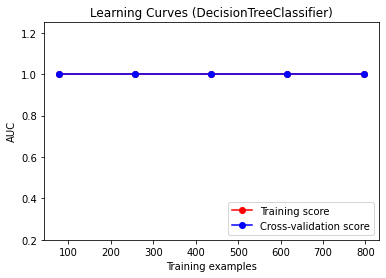

In [ ]:
title = "Learning Curves (DecisionTreeClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(min_samples_split = 3, min_samples_leaf = 3, max_depth = 160, criterion = 'gini')                             # fill this in
plot_learning_curve(dt, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('DT_curve.pdf', transparent=True, dpi=300)
plt.savefig('DT_curve.eps', transparent=True, dpi=300)
plt.show()

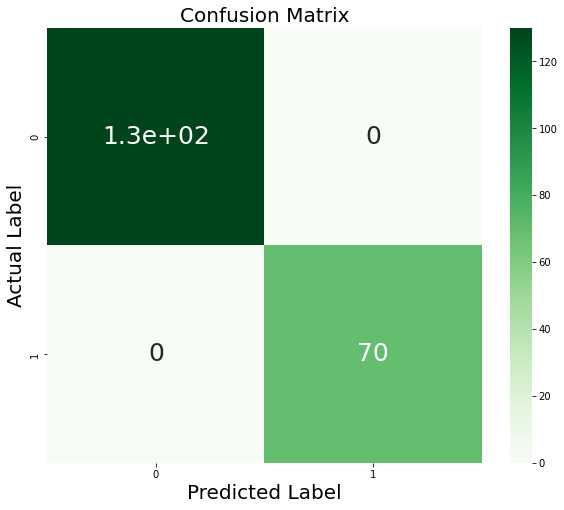

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('DT_confusion.pdf', transparent=True, dpi=300)
plt.savefig('DT_confusion.eps', transparent=True, dpi=300)

##XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

xg_randomcv = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

#fit the randomized model
xg_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=10,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.05],
                                        'max_depth': range(2, 10),
                                        'n_estimators': range(60, 220, 40)},
                   scoring='roc_auc', verbose=True)

In [ ]:
print('\n All results:')
print(xg_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([2.43143582, 2.31252117, 1.20446506, 1.09324908, 0.76692462,
       1.27500629, 1.05471907, 0.37913117, 1.24229503, 0.44243236]), 'std_fit_time': array([0.52591532, 0.28995372, 0.35634539, 0.2150903 , 0.14118355,
       0.09480744, 0.10351045, 0.09983277, 0.14485708, 0.12394558]), 'mean_score_time': array([0.00954814, 0.00723038, 0.01469698, 0.01970053, 0.00767689,
       0.00933032, 0.01207175, 0.01973376, 0.05099053, 0.01051116]), 'std_score_time': array([0.00272302, 0.00535194, 0.00536987, 0.01432987, 0.00309577,
       0.0048705 , 0.00704842, 0.01403764, 0.02617368, 0.01053875]), 'param_n_estimators': masked_array(data=[140, 180, 180, 180, 100, 180, 140, 60, 140, 60],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 9, 7, 7, 6, 2, 2, 6, 5, 9],
             mask=[False, False, False, False, False

In [ ]:
print('\n Best estimator:')
print(xg_randomcv.best_estimator_)


 Best estimator:
XGBClassifier(learning_rate=0.01, max_depth=4, n_estimators=140, nthread=4,
              seed=42)


In [ ]:
print('\n Best hyperparameters:')
print(xg_randomcv.best_params_)


 Best hyperparameters:
{'n_estimators': 140, 'max_depth': 4, 'learning_rate': 0.01}


In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(n_estimators = 140, max_depth = 4, learning_rate = 0.01)
xg.fit(X_train, y_train)

XGBClassifier(learning_rate=0.01, max_depth=4, n_estimators=140)

In [ ]:
y_pred_xg = xg.predict(X_test)
model_report(y_test, y_pred_xg)

Accuracy =  1.0
Precision =  1.0
Recall\Sensitivity =  1.0
Specificity =  1.0
F1 Score =  1.0
AUC Score = 1.0
Kappa score =  1.0
Log Loss =  9.992007221626413e-16 



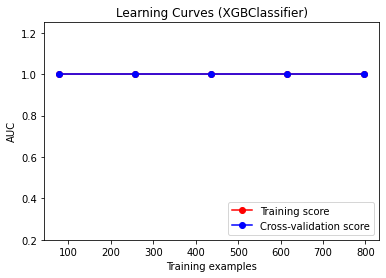

In [ ]:
title = "Learning Curves (XGBClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
xg = XGBClassifier(n_estimators = 140, max_depth = 2, learning_rate = 0.01)                             # fill this in
plot_learning_curve(xg, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('XG_curve.pdf', transparent=True, dpi=300)
plt.savefig('XG_curve.eps', transparent=True, dpi=300)
plt.show()

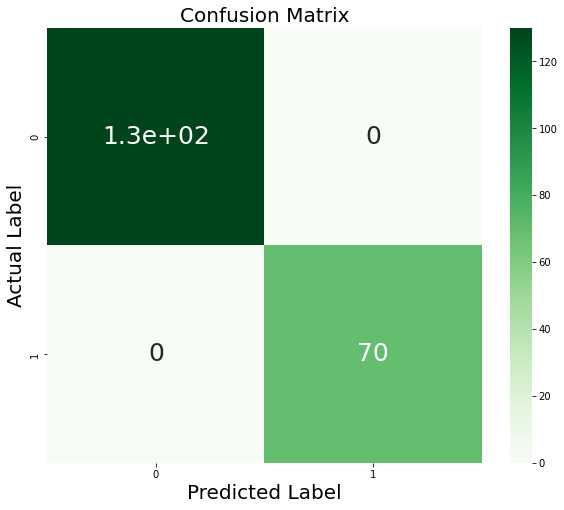

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('XG_confusion.pdf', transparent=True, dpi=300)
plt.savefig('XG_confusion.eps', transparent=True, dpi=300)

##LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

grid_values = {'penalty': ['l1','l2'], 
               'C': [0.001,0.01,0.1,1,10,100,1000]}
lr=LogisticRegression(random_state=42)
lr_randomcv = RandomizedSearchCV(lr, param_distributions=grid_values, cv=5)
#fit the randomized model
lr_randomcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']})

In [ ]:
print('\n All results:')
print(lr_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.00031414, 0.00688887, 0.01032548, 0.00031176, 0.00031362,
       0.01576538, 0.04151697, 0.00032754, 0.00027804, 0.02934823]), 'std_fit_time': array([1.36969895e-04, 1.65275391e-03, 2.30581628e-04, 3.97384770e-05,
       3.92259358e-05, 1.12951553e-03, 3.58977071e-03, 3.15067784e-05,
       8.73328264e-06, 9.31910938e-04]), 'mean_score_time': array([0.        , 0.00048404, 0.00047364, 0.        , 0.        ,
       0.00045671, 0.00050077, 0.        , 0.        , 0.00050306]), 'std_score_time': array([0.00000000e+00, 4.94998313e-05, 4.04209434e-05, 0.00000000e+00,
       0.00000000e+00, 1.35556007e-05, 3.14403874e-05, 0.00000000e+00,
       0.00000000e+00, 1.31515457e-05]), 'param_penalty': masked_array(data=['l1', 'l2', 'l2', 'l1', 'l1', 'l2', 'l2', 'l1', 'l1',
                   'l2'],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), '

In [ ]:
print('\n Best estimator:')
print(lr_randomcv.best_estimator_)


 Best estimator:
LogisticRegression(C=100, random_state=42)


In [ ]:
print('\n Best hyperparameters:')
print(lr_randomcv.best_params_)


 Best hyperparameters:
{'penalty': 'l2', 'C': 100}


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l2', C = 100)
lr.fit(X_train, y_train)

LogisticRegression(C=100)

In [ ]:
y_pred_lr = lr.predict(X_test)
model_report(y_test, y_pred_lr)

Accuracy =  1.0
Precision =  1.0
Recall\Sensitivity =  1.0
Specificity =  1.0
F1 Score =  1.0
AUC Score = 1.0
Kappa score =  1.0
Log Loss =  9.992007221626413e-16 



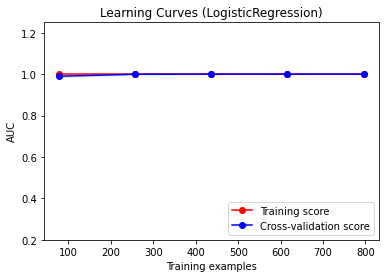

In [ ]:
title = "Learning Curves (LogisticRegression)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
lr = LogisticRegression(penalty = 'l2', C = 100)                            # fill this in
plot_learning_curve(lr, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('LR_curve.pdf', transparent=True, dpi=300)
plt.savefig('LR_curve.eps', transparent=True, dpi=300)
plt.show()

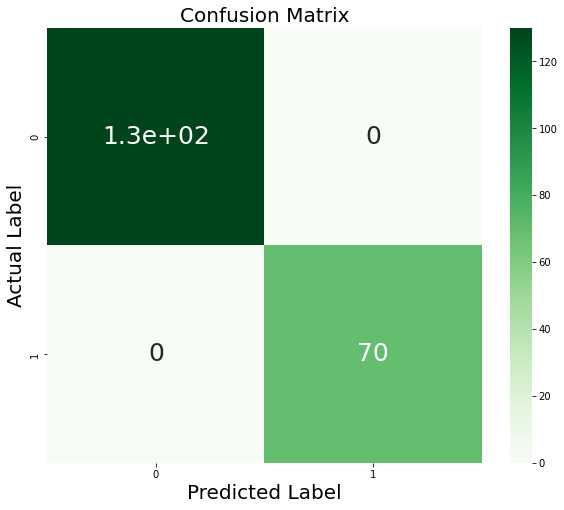

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('LR_confusion.pdf', transparent=True, dpi=300)
plt.savefig('LR_confusion.eps', transparent=True, dpi=300)

In [ ]:
from sklearn.metrics import roc_curve

# Compute fpr, tpr, thresholds and roc auc
fpr_DT, tpr_DT, thresholds = roc_curve(y_test, y_pred_dt)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_pred_lr)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_svc)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, y_pred_xg)

In [ ]:
from sklearn.metrics import auc

roc_auc_DT = auc(fpr_DT, tpr_DT)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_LR = auc(fpr_LR, tpr_LR)
roc_auc_svc = auc(fpr_svc, tpr_svc)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xg = auc(fpr_xg, tpr_xg)

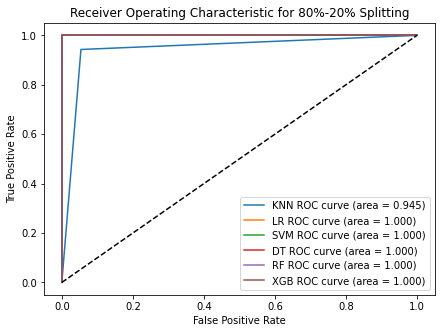

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
plt.figure(figsize = (7, 5))
plt.plot(fpr_knn, tpr_knn, label='KNN ROC curve (area = %0.3f)' % roc_auc_knn)
plt.plot(fpr_LR, tpr_LR, label='LR ROC curve (area = %0.3f)' % roc_auc_LR)
plt.plot(fpr_svc, tpr_svc, label='SVM ROC curve (area = %0.3f)' % roc_auc_svc)
plt.plot(fpr_DT, tpr_DT, label='DT ROC curve (area = %0.3f)' % roc_auc_DT)
plt.plot(fpr_rf, tpr_rf, label='RF ROC curve (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_xg, tpr_xg, label='XGB ROC curve (area = %0.3f)' % roc_auc_xg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for 80%-20% Splitting')
plt.legend(loc="lower right")
plt.savefig('all_roc.pdf', transparent=True, dpi=300)
plt.savefig('all_roc.eps', transparent=True, dpi=300)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
# 700 features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2,k=20)
X = chi2_features.fit_transform(features, target)
y = target

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
importance = pd.DataFrame(model.feature_importances_)
columns = pd.DataFrame(features.columns)
featureScores = pd.concat([columns,importance],axis=1)
featureScores.columns = ['Features','importance']
print(featureScores.nlargest(25,'importance')) 

                    Features  importance
10                  Age_Mons    0.447817
8                   A9_Score    0.101977
5                   A6_Score    0.066959
3                   A4_Score    0.063047
4                   A5_Score    0.062954
2                   A3_Score    0.038519
9                  A10_Score    0.034387
6                   A7_Score    0.028024
0                   A1_Score    0.025219
1                   A2_Score    0.022008
7                   A8_Score    0.016571
70       contry_of_res_Italy    0.007587
19          ethnicity_Others    0.006858
74      contry_of_res_Kuwait    0.006547
73  contry_of_res_Kazakhstan    0.005897
43     contry_of_res_Bolivia    0.004387
11                    result    0.004111
21     ethnicity_South Asian    0.003782
68     contry_of_res_Ireland    0.003503
15           ethnicity_Black    0.003266
56      contry_of_res_Europe    0.003257
22         ethnicity_Turkish    0.003225
12                  gender_f    0.003211
20        ethnic

<Figure size 1440x504 with 0 Axes>

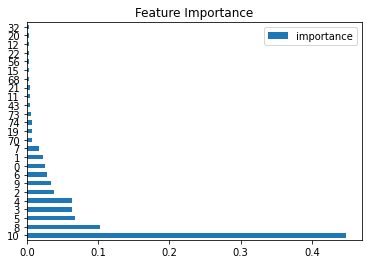

In [ ]:
plt.figure(figsize=(20,7))
featureScores.nlargest(25,'importance').plot(kind='barh')
plt.title('Feature Importance')
plt.savefig('feature_im_combined.pdf', 
           transparent=True, dpi=300)
plt.savefig('feature_im_combined.eps', 
           transparent=True, dpi=300)